In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('latest.csv')
data

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,100011,1,Dress,Adidas,Men's Fashion,40.000000,1.043159,Black,XL
1,100012,2,Shoes,H&M,Women's Fashion,82.000000,4.026416,Black,L
2,100013,3,Dress,Adidas,Women's Fashion,44.000000,3.337938,Yellow,XL
3,100014,4,Shoes,Zara,Men's Fashion,23.000000,1.049523,White,S
4,100015,5,T-shirt,Adidas,Men's Fashion,79.000000,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
59995,160006,59996,Shoes,Zara,Women's Fashion,243.189944,3.984278,Black,M
59996,160007,59997,Sweater,Nike,Kids' Fashion,243.193094,3.984413,Green,L
59997,160008,59998,Sweater,Zara,Men's Fashion,243.196244,3.984548,White,L
59998,160009,59999,T-shirt,Zara,Women's Fashion,243.199394,3.984684,Blue,S


In [5]:
# Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64


In [6]:
# Handle missing values
# Let's assume we want to fill missing values in numerical columns with their respective means
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Now, check again for missing values to ensure they have been handled
missing_values_after = data.isnull().sum()
print("\nMissing Values After Handling:\n", missing_values_after)


Missing Values After Handling:
 User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64


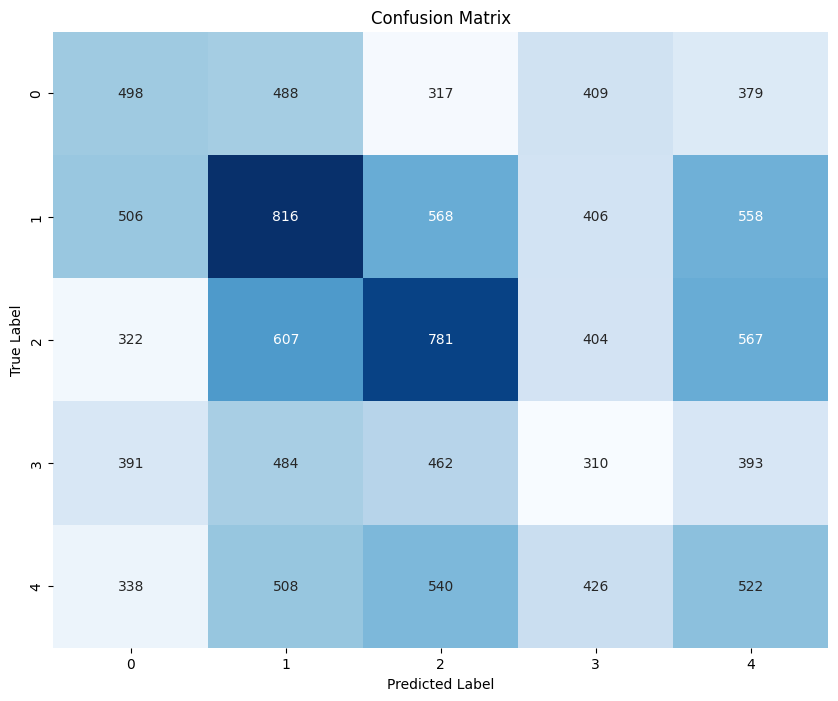

In [15]:
# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Compute ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
for i, class_name in enumerate(rf_classifier.classes_):
    fpr[class_name], tpr[class_name], _ = roc_curve((y_test == class_name).astype(int), probs[:, i])
    roc_auc[class_name] = roc_auc_score((y_test == class_name).astype(int), probs[:, i])

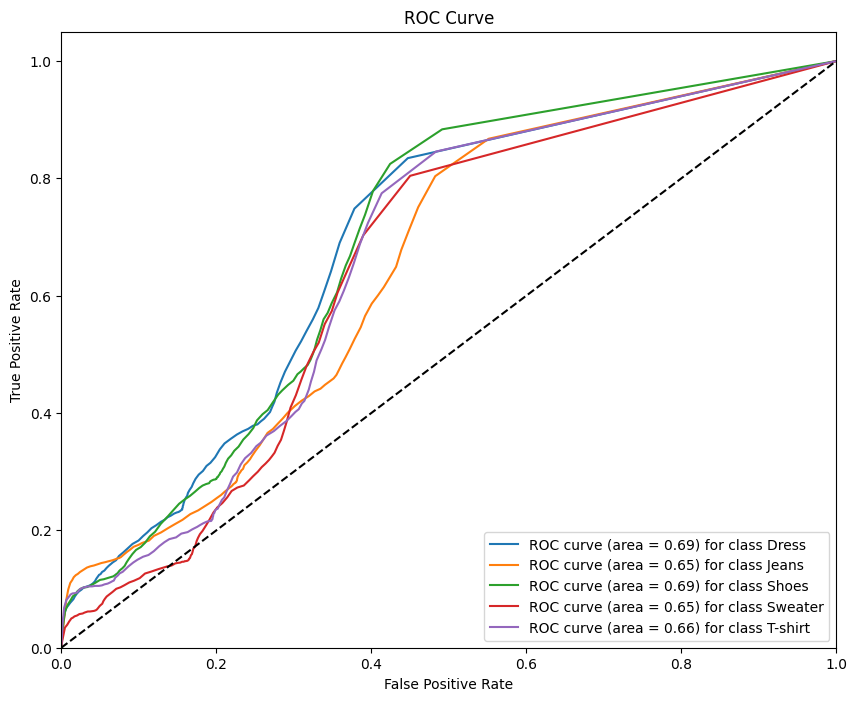

In [14]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for class_name in rf_classifier.classes_:
    plt.plot(fpr[class_name], tpr[class_name], label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[class_name], class_name))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

C:\Users\goura\AppData\Local\Temp\ipykernel_22064\1429797663.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_importance, y=top_features, palette="viridis")


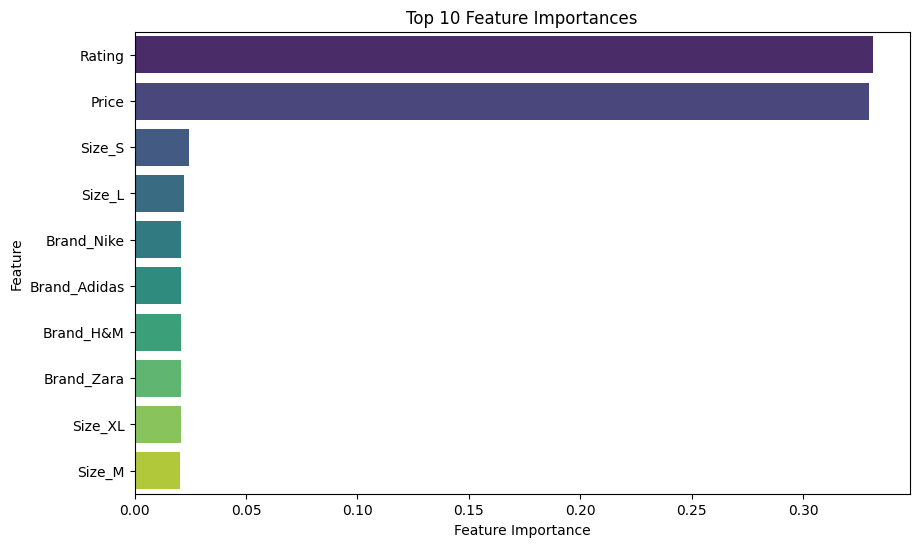

In [16]:
# Compute probabilities for each class
probs = rf_classifier.predict_proba(X_test)

# Feature Importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
top_features_idx = feature_importance.argsort()[-10:][::-1]  # Top 10 features
top_features = feature_names[top_features_idx]
top_feature_importance = feature_importance[top_features_idx]

# Bar plot of top features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importance, y=top_features, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

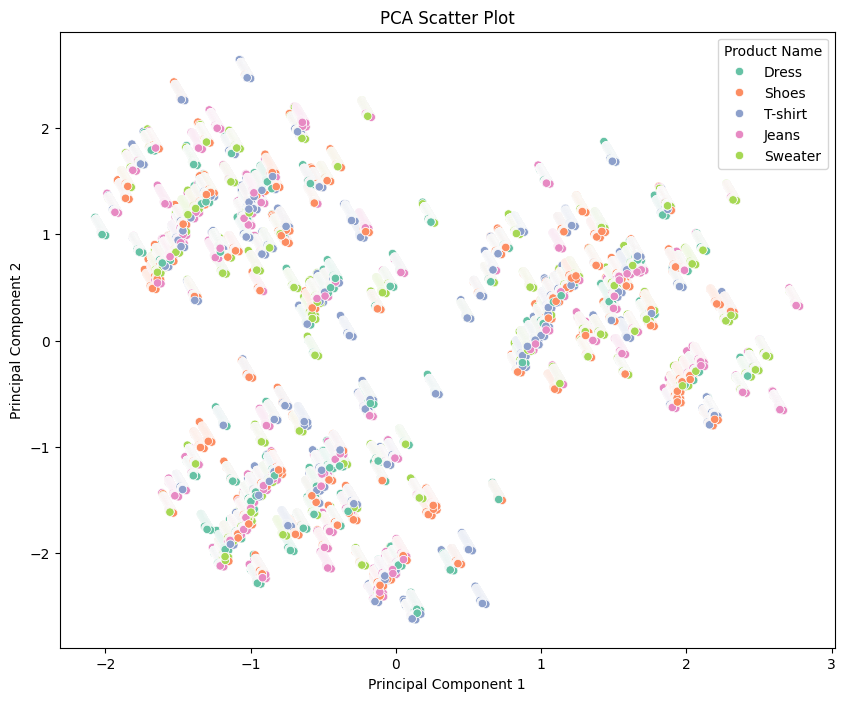

In [17]:
# Perform PCA for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(title='Product Name', loc='upper right')
plt.show()

In [7]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Brand', 'Category', 'Color', 'Size'])

# Split dataset into features (X) and target variable (y)
X = data_encoded.drop(['User ID', 'Product ID', 'Product Name'], axis=1)
y = data_encoded['Product Name']
X

,Price,Rating,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Category_Kids' Fashion,Category_Men's Fashion,Category_Women's Fashion,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
0,40.000000,1.043159,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
1,82.000000,4.026416,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
2,44.000000,3.337938,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
3,23.000000,1.049523,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
4,79.000000,4.302773,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,243.189944,3.984278,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False
59996,243.193094,3.984413,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False
59997,243.196244,3.984548,False,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False
59998,243.199394,3.984684,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False


In [8]:
y

0          Dress
1          Shoes
2          Dress
3          Shoes
4        T-shirt
          ...   
59995      Shoes
59996    Sweater
59997    Sweater
59998    T-shirt
59999    Sweater
Name: Product Name, Length: 60000, dtype: object

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
accuracy_percentage = accuracy * 100
# Print accuracy in percentage
print("Accuracy:", accuracy_percentage, "%")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 85.37083333333334 %

Classification Report:
               precision    recall  f1-score   support

       Dress       0.24      0.24      0.24      2091
       Jeans       0.28      0.29      0.28      2854
       Shoes       0.29      0.29      0.29      2681
     Sweater       0.16      0.15      0.16      2040
     T-shirt       0.22      0.22      0.22      2334

    accuracy                           0.24     12000
   macro avg       0.24      0.24      0.24     12000
weighted avg       0.24      0.24      0.24     12000

